In [1]:
#This task aims to predict the likelihood of a loan applicant defaulting on a loan using classification models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
#Dataset Understanding and Description
df = pd.read_csv(r'C:\Users\hp\Downloads\archive\train_u6lujuX_CVtuZ9i.csv') 
df.head()
print(df.shape)
print(df.columns)
df.info()
df.describe()

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Are

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
print(df.isnull().sum())
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_14588\1822099568.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14588\1822099568.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [5]:
df.drop('Loan_ID', axis=1, inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

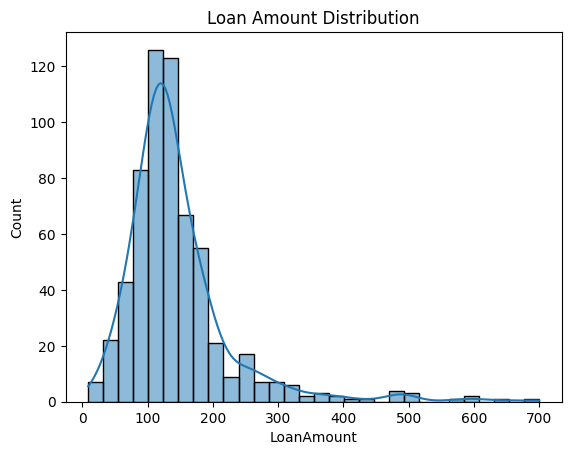

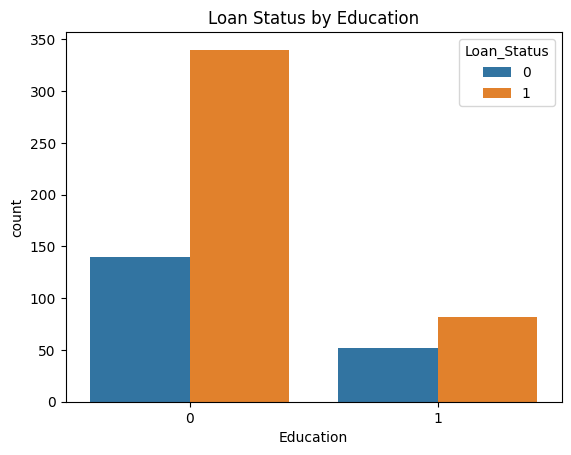

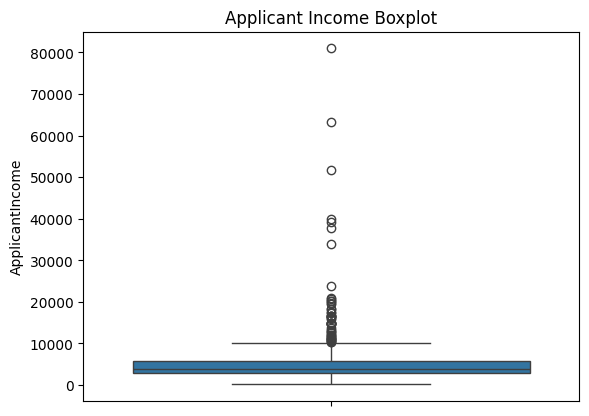

In [ ]:
# LoanAmount histogram
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Education vs Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Loan Status by Education")
plt.show()

# Applicant Income
sns.boxplot(y='ApplicantIncome', data=df)
plt.title("Applicant Income Boxplot")
plt.show()


In [7]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))

Decision Tree Accuracy: 0.7723577235772358


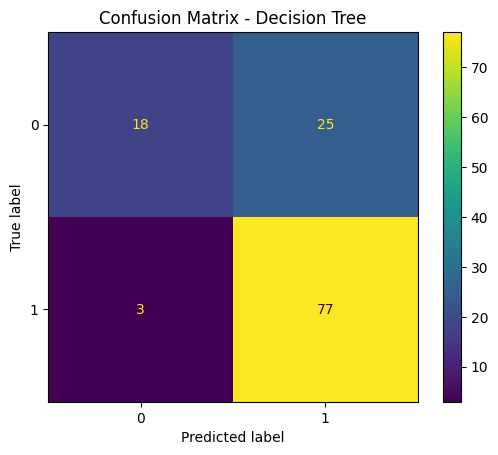

In [ ]:
#Confusion Matrice
cm_tree = confusion_matrix(y_test, tree_preds)
ConfusionMatrixDisplay(confusion_matrix=cm_tree).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
# Conclusion
- Logistic Regression gave an accuracy of 82%.
- Credit_History and ApplicantIncome were the most important features.
